### Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)
%matplotlib notebook

In [3]:
from scipy import stats

### Bringing in the data as a DataFrame - 5 times

In [4]:
suicides_df1 = pd.read_csv('who_suicide_statistics.csv')
suicides_df2 = pd.read_csv('who_suicide_statistics.csv')
suicides_df3 = pd.read_csv('who_suicide_statistics.csv')
suicides_df4 = pd.read_csv('who_suicide_statistics.csv')
suicides_df5 = pd.read_csv('who_suicide_statistics.csv')

In [5]:
suicides_df1.head(20)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [6]:
suicides_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [7]:
describe = suicides_df3.describe()
describe.drop(columns='year',inplace=True)

cm = sns.light_palette("#2ecc71", as_cmap=True)
describe = describe.style.background_gradient(cmap=cm)
describe

,suicides_no,population
count,41520.000000,38316.000000
mean,193.315390,1664091.135374
std,800.589926,3647231.227487
min,0.000000,259.000000
25%,1.000000,85112.750000
50%,14.000000,380655.000000
75%,91.000000,1305698.000000
max,22338.000000,43805214.000000


In [8]:
describe.columns

Index(['suicides_no', 'population'], dtype='object')

In [9]:
suicides_df3.describe(include=['object'])
# 'freq' row represents the number of occurences of the 'top' row in the dataset

,country,sex,age
count,43776,43776,43776
unique,141,2,6
top,Mauritius,female,5-14 years
freq,456,21888,7296


In [10]:
suicides_df3[suicides_df3.age == "75+ years"]

,country,year,sex,age,suicides_no,population
5,Albania,1985,female,75+ years,NaN,34200.0
11,Albania,1985,male,75+ years,NaN,21100.0
17,Albania,1986,female,75+ years,NaN,34900.0
23,Albania,1986,male,75+ years,NaN,21400.0
29,Albania,1987,female,75+ years,1.0,35600.0
...,...,...,...,...,...,...
43751,Virgin Islands (USA),2012,male,75+ years,0.0,2135.0
43757,Virgin Islands (USA),2015,female,75+ years,0.0,3508.0
43763,Virgin Islands (USA),2015,male,75+ years,0.0,2496.0
43769,Zimbabwe,1990,female,75+ years,3.0,NaN


In [11]:
# Renaming columns
suicides_df1.rename(columns={'suicides_no':'suicides'},inplace=True)
suicides_df1.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population'], dtype='object')

### Dealing with null values in the suicide column

In [12]:
# Filling in null values of suicides with zero
suicides_df1['suicides'].fillna(0,inplace=True)

suicides_df1.sample(10)

,country,year,sex,age,suicides,population
32997,Russian Federation,1983,male,5-14 years,0.0,10247800.0
25012,Mauritius,1991,female,55-74 years,5.0,53600.0
11652,Dominica,1984,female,15-24 years,0.0,8600.0
15551,Germany,1990,male,75+ years,1516.0,1717700.0
7283,Bulgaria,1982,male,75+ years,171.0,158100.0
29016,Paraguay,2000,female,15-24 years,23.0,521651.0
27653,Nicaragua,2001,female,75+ years,0.0,NaN
15619,Germany,1996,male,25-34 years,1441.0,7162600.0
18690,Iceland,1982,male,15-24 years,3.0,22700.0
13888,Falkland Islands (Malvinas),1981,female,55-74 years,0.0,NaN


### Dealing with null values in the population column

In [13]:
# Total Number of null values in the population column
suicides_df1['population'].isna().sum()

5460

In [14]:
# Getting the measures of central tendency for the population column
suicides_df1['population'].median()
suicides_df1['population'].mean()
# suicides_df1['population'].mode()

1664091.1353742562

In [15]:
# Determining the unique countries in our dataset
suicides_df1['country'].nunique()

141

In [16]:
# Get the countries that have null values in the population column
# Group them according to the country column 
# Determine the size of each group
nullcountries = suicides_df1[suicides_df1['population'].isna()].groupby('country').size().reset_index()
nullcountries

,country,0
0,Anguilla,348
1,Bermuda,384
2,Bolivia,48
3,British Virgin Islands,336
4,Cayman Islands,324
5,Dominica,372
6,Dominican Republic,396
7,Falkland Islands (Malvinas),60
8,Haiti,84
9,Honduras,120


In [17]:
# Get the countries that have null values in the population column
# Group them according to the country column 
# Determine the sum of suicides for each group
nullcountries = suicides_df1[suicides_df1['population'].isna()].groupby('country').sum().reset_index()
nullcountries

,country,year,suicides,population
0,Anguilla,695832,2.0,0.0
1,Bermuda,767808,85.0,0.0
2,Bolivia,96072,54.0,0.0
3,British Virgin Islands,670236,8.0,0.0
4,Cayman Islands,647256,19.0,0.0
5,Dominica,743976,50.0,0.0
6,Dominican Republic,790656,5312.0,0.0
7,Falkland Islands (Malvinas),118860,1.0,0.0
8,Haiti,167832,28.0,0.0
9,Honduras,240204,1072.0,0.0


In [18]:
# Total Number of Suicides in the data
suicides_df1['suicides'].sum()

8026455.0

In [19]:
# Getting the total number of suicides for all countries with null values in their population
suicides_df1[suicides_df1['population'].isna()].groupby('country').sum().sum().reset_index()

,index,0
0,year,10916688.0
1,suicides,27988.0
2,population,0.0


### Dropping countries from the dataset with a small number of total suicides
* The sum of the suicides in the countries without population data is 0.35% of the total number of suicides
* These columns shall be dropped

In [20]:
# Getting the indices of all rows with a null value in their population column
null_indexes = suicides_df1[suicides_df1['population'].isna()].index
null_indexes

Int64Index([  372,   373,   374,   375,   376,   377,   378,   379,   380,
              381,
            ...
            43766, 43767, 43768, 43769, 43770, 43771, 43772, 43773, 43774,
            43775],
           dtype='int64', length=5460)

In [21]:
suicides_df1['suicides'].fillna(0,inplace=True)

suicides_df1.sample(10)
# Dropping all rows with a null value in their population column
suicides_df1.drop(null_indexes,inplace=True) 

In [22]:
# Confirming that there are zero null values
suicides_df1.isna().sum()

country       0
year          0
sex           0
age           0
suicides      0
population    0
dtype: int64

In [23]:
suicides_df1.sample(15)

,country,year,sex,age,suicides,population
25854,Mongolia,2016,male,15-24 years,85.0,252851.0
15786,Germany,2010,male,15-24 years,474.0,4702588.0
14805,France,2004,male,5-14 years,15.0,3782655.0
11019,Czech Republic,2006,female,5-14 years,0.0,488298.0
918,Antigua and Barbuda,2002,male,15-24 years,0.0,6416.0
3977,Barbados,1980,female,75+ years,0.0,5000.0
4982,Belgium,1999,female,35-54 years,198.0,1462303.0
21329,Kazakhstan,1988,female,75+ years,89.0,272700.0
30904,Puerto Rico,1995,female,55-74 years,10.0,284606.0
1016,Antigua and Barbuda,2012,male,35-54 years,0.0,13280.0


### Getting the number of countries that have data from before 1985

In [24]:
# Countries with data before 1985
suicides_df1[suicides_df1['year'].between(1979,1982)].groupby('country').size().reset_index()

,country,0
0,Argentina,48
1,Armenia,24
2,Australia,48
3,Austria,48
4,Azerbaijan,24
5,Bahamas,36
6,Barbados,48
7,Belarus,24
8,Belgium,48
9,Belize,48


In [25]:
suicides_df1[suicides_df1['year'] == 1987].groupby('country').size().count()

82

In [26]:
suicides_df1[suicides_df1['country'] == 'Georgia']

,country,year,sex,age,suicides,population
15132,Georgia,1981,female,15-24 years,8.0,454200.0
15133,Georgia,1981,female,25-34 years,12.0,376500.0
15134,Georgia,1981,female,35-54 years,20.0,670500.0
15135,Georgia,1981,female,5-14 years,0.0,426500.0
15136,Georgia,1981,female,55-74 years,26.0,441300.0
...,...,...,...,...,...,...
15535,Georgia,2015,male,25-34 years,19.0,271700.0
15536,Georgia,2015,male,35-54 years,46.0,480200.0
15537,Georgia,2015,male,5-14 years,1.0,234300.0
15538,Georgia,2015,male,55-74 years,34.0,320200.0


### Average number of suicides for each year

## Visualizations

#### For Visualizing, I shall use a different dataframe because I would like all the available suicide statistics to be represented. I shall not use the above dataframe with the dropped rows for population values that are null

In [27]:
suicides_df2.rename(columns={'suicides_no':'suicides'},inplace=True)
suicides_df2.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population'], dtype='object')

In [28]:
suicides_df2['suicides'].fillna(0,inplace=True)

suicides_df2.sample(10)
# suicides_df2['suicides'].isna().sum()

,country,year,sex,age,suicides,population
16252,Greece,2012,female,55-74 years,26.0,1272278.0
11714,Dominica,1989,female,35-54 years,0.0,NaN
8836,Chile,2009,female,55-74 years,59.0,1260914.0
13249,El Salvador,1998,female,25-34 years,35.0,445330.0
20918,Japan,1993,female,35-54 years,1955.0,18064000.0
32996,Russian Federation,1983,male,35-54 years,0.0,16781400.0
21789,Kiribati,2001,male,5-14 years,0.0,11403.0
11815,Dominica,1997,male,25-34 years,1.0,NaN
27886,Norway,1983,male,55-74 years,0.0,390400.0
5801,Bermuda,1997,female,75+ years,0.0,NaN


In [29]:
suicides_df2['country'].nunique()

141

In [30]:
# Defining various font dictionaries to be used for visualization
fontdict_labels={'fontsize':'14','fontname':'Times New Roman'}
fontdict_title = {'fontsize':'18','fontname':'Times New Roman'}

### 1.) Trends in the number of suicides between 1979 and 2016

In [31]:
# Getting the sum of suicides for each year
years = suicides_df2.groupby('year').sum().reset_index()
# Dropping the data for 2016; the data for this year is misleading because it is incomplete
years.drop(37,inplace=True)
years.tail()

,year,suicides,population
32,2011,239972.0,2.118125e+09
33,2012,234085.0,2.046593e+09
34,2013,229421.0,2.171610e+09
35,2014,227793.0,2.167529e+09
36,2015,207908.0,1.948657e+09


In [32]:
# Getting the total number of suicides per year for both genders
males_df = suicides_df2[suicides_df2['sex'] == 'male'].groupby('year').sum().reset_index()
females_df = suicides_df2[suicides_df2['sex'] == 'female'].groupby('year').sum().reset_index()
# Dropping the data for 2016; the data for this year is misleading because it is incomplete
males_df.drop(37,inplace=True)
females_df.drop(37,inplace=True)

<IPython.core.display.Javascript object>


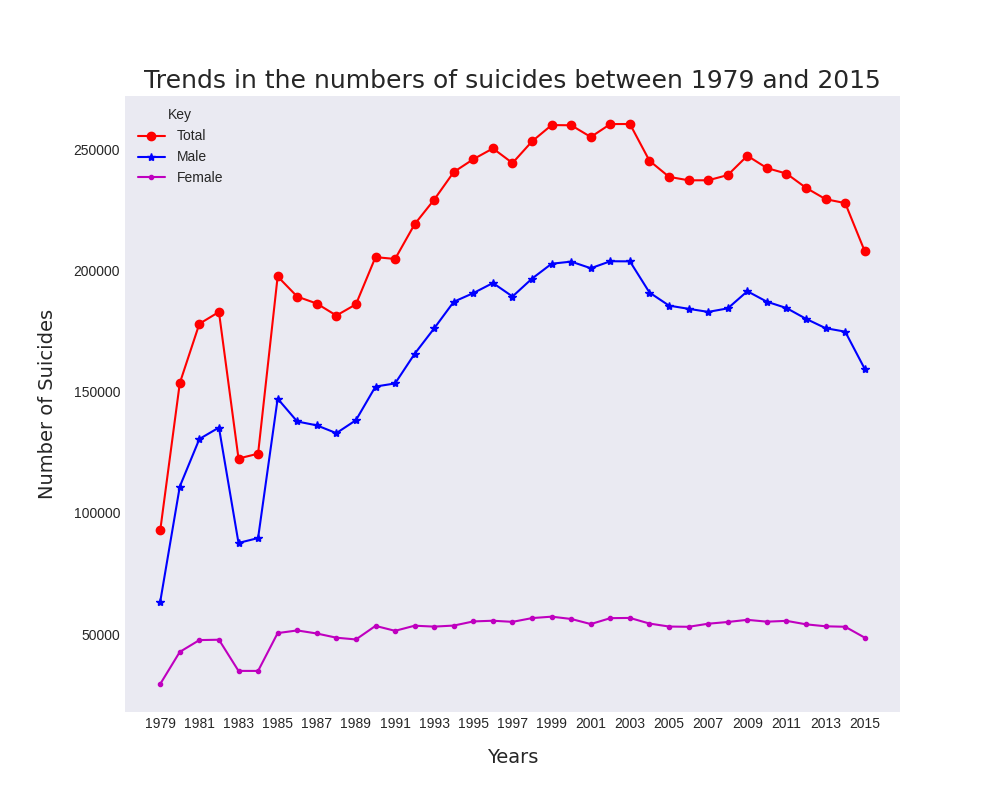

In [33]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(10,8))

plt.plot(years['year'],years['suicides'],color='r',label='Total',marker='o')
plt.plot(males_df['year'],males_df['suicides'],color='b',label='Male',marker='*')
plt.plot(females_df['year'],females_df['suicides'],color='m',label='Female',marker='.')
plt.xlabel('Years',fontdict=fontdict_labels,labelpad=12)
plt.xticks(years['year'][::2])
plt.ylabel('Number of Suicides',fontdict=fontdict_labels,labelpad=12)
plt.legend(loc='upper left',title='Key')
plt.title('Trends in the numbers of suicides between 1979 and 2015',fontdict=fontdict_title)

plt.show()
# plt.savefig('/home/allen/Documents/CDS/Project/Visualizations/Visual 1',bbox_inches='tight')

In [34]:
years_mean = suicides_df2.groupby('year').mean().reset_index()
years_mean.drop(37,inplace=True)
years_mean

,year,suicides,population
0,1979,138.080357,1.491164e+06
1,1980,190.980100,1.639912e+06
2,1981,178.728916,1.436840e+06
3,1982,195.398504,1.437448e+06
4,1983,129.145570,1.522344e+06
5,1984,148.127381,1.610636e+06
6,1985,182.900926,1.427480e+06
7,1986,175.208333,1.503182e+06
8,1987,165.216312,1.496451e+06
9,1988,171.795455,1.547896e+06


<IPython.core.display.Javascript object>


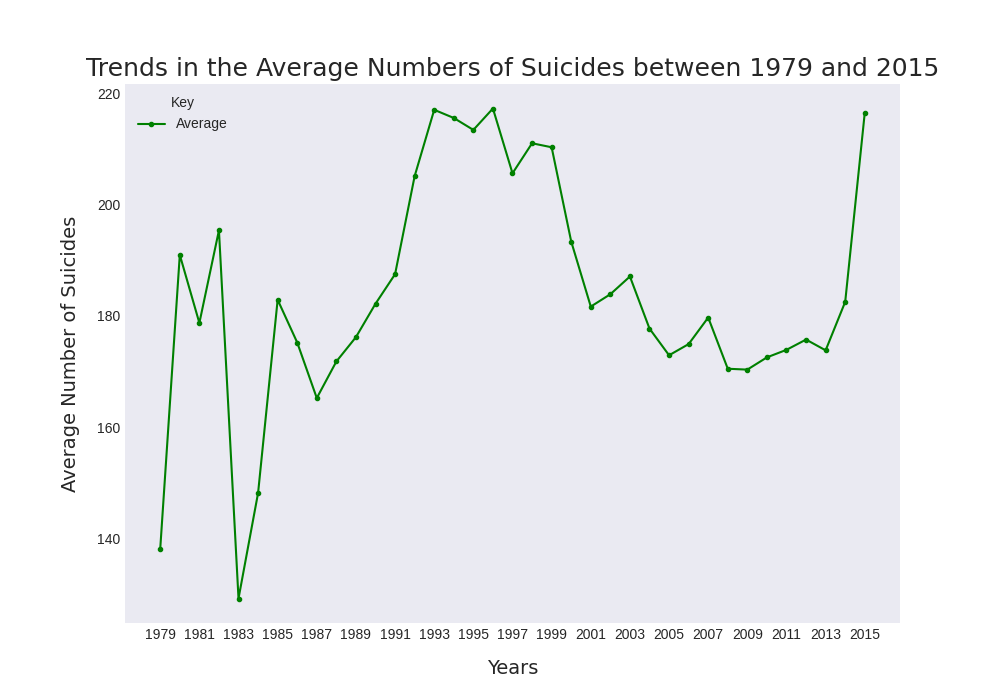

Text(0.5, 1.0, 'Trends in the Average Numbers of Suicides between 1979 and 2015')

In [35]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(10,7))

plt.plot(years_mean['year'],years_mean['suicides'],color='g',label='Average',marker='.')
plt.xlabel('Years',fontdict=fontdict_labels,labelpad=12)
plt.xticks(years_mean['year'][::2])
plt.ylabel('Average Number of Suicides',fontdict=fontdict_labels,labelpad=12)
plt.legend(loc='upper left',title='Key')
plt.title('Trends in the Average Numbers of Suicides between 1979 and 2015',fontdict=fontdict_title)

### 2.) Differences between total number of suicides in males and females between 1979 and 2016

In [36]:
# Getting the number of suicides for each year per gender
years_male_female_df = suicides_df2.groupby(['year','sex']).sum().reset_index()
years_male_female_df.drop([74,75],inplace=True)

<IPython.core.display.Javascript object>


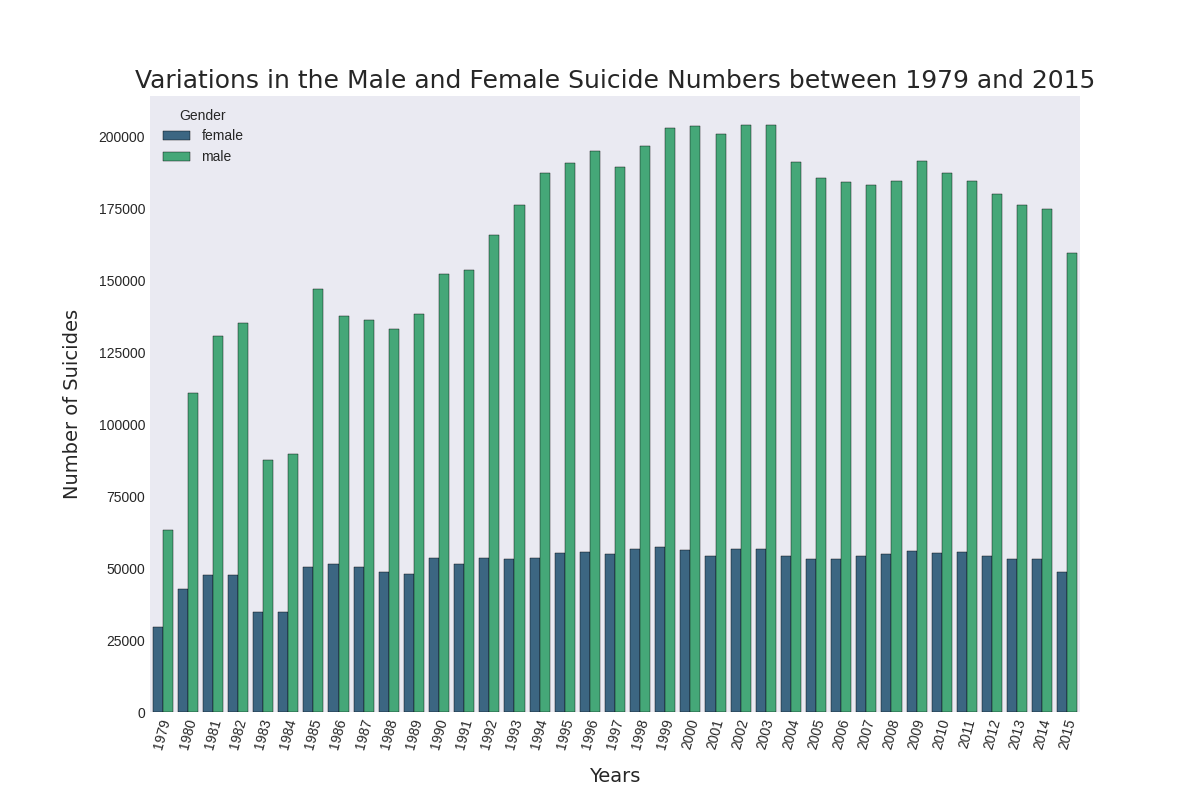

In [37]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(12,8))

sns.barplot(x = 'year', y = 'suicides',hue='sex',data=years_male_female_df,palette='viridis',edgecolor = 'black',linewidth=0.3)

plt.xlabel('Years',fontdict=fontdict_labels,labelpad=12)
plt.xticks(rotation=75)
plt.ylabel('Number of Suicides',fontdict=fontdict_labels,labelpad=12)
plt.gca().legend(loc='upper left').set_title('Gender')
# plt.gca().legend().set_loc('upper left')
plt.title('Variations in the Male and Female Suicide Numbers between 1979 and 2015',fontdict=fontdict_title)

plt.show()
# plt.savefig('/home/allen/Documents/CDS/Project/Visualizations/Visual 2',bbox_inches='tight')

In [38]:
# Get the total number of suicides for male and female
male_female_df = suicides_df2.groupby('sex').sum().reset_index()
male_female_df

,sex,year,suicides,population
0,female,43743222,1902272.0,3.263022e+10
1,male,43743222,6124183.0,3.113110e+10


In [39]:
males = male_female_df[male_female_df.sex == 'male']
females = male_female_df[male_female_df.sex == 'female']
males.suicides.values/females.suicides.values

array([3.21940448])

<IPython.core.display.Javascript object>


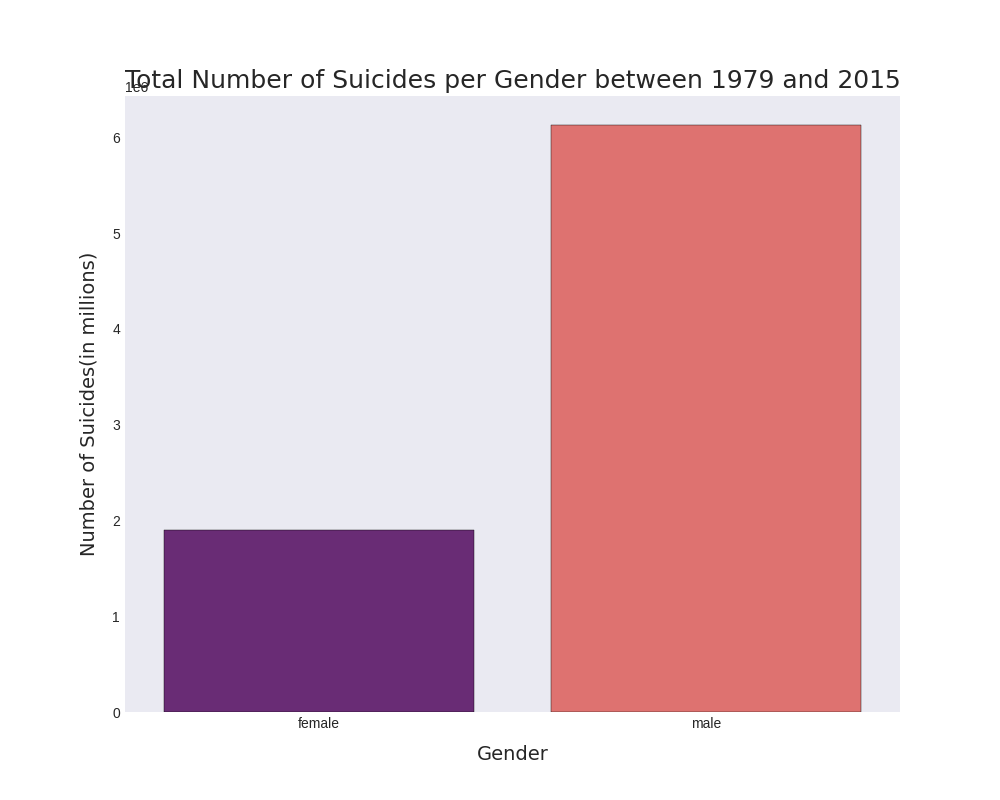

In [40]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(10,8))

sns.barplot(x = 'sex', y = 'suicides',data=male_female_df,palette='magma',edgecolor = 'black',linewidth=0.3)
plt.xlabel('Gender',fontdict=fontdict_labels,labelpad=10)
plt.ylabel('Number of Suicides(in millions)',fontdict=fontdict_labels,labelpad=10)
plt.title('Total Number of Suicides per Gender between 1979 and 2015',fontdict=fontdict_title)

# plt.savefig('/home/allen/Documents/CDS/Project/Visualizations/Visual 3',bbox_inches='tight')

plt.show()

### 3.) Differences between total number of suicides for all the age groups
        - Per Gender as well

In [41]:
age_groups_df = suicides_df2.groupby('age').sum().reset_index()
age_groups_df

,age,year,suicides,population
0,15-24 years,14581074,984287.0,1.103601e+10
1,25-34 years,14581074,1367333.0,1.059013e+10
2,35-54 years,14581074,2895388.0,1.745566e+10
3,5-14 years,14581074,63312.0,1.091554e+10
4,55-74 years,14581074,1958468.0,1.065111e+10
5,75+ years,14581074,757667.0,3.112869e+09


In [42]:
age_highest = age_groups_df[(age_groups_df.age == '35-54 years')]
age_second_highest = age_groups_df[(age_groups_df.age == '55-74 years')]
sumTwo = age_highest.suicides.values+age_second_highest.suicides.values
(sumTwo/age_groups_df.suicides.sum())*100

array([60.47322261])

<IPython.core.display.Javascript object>


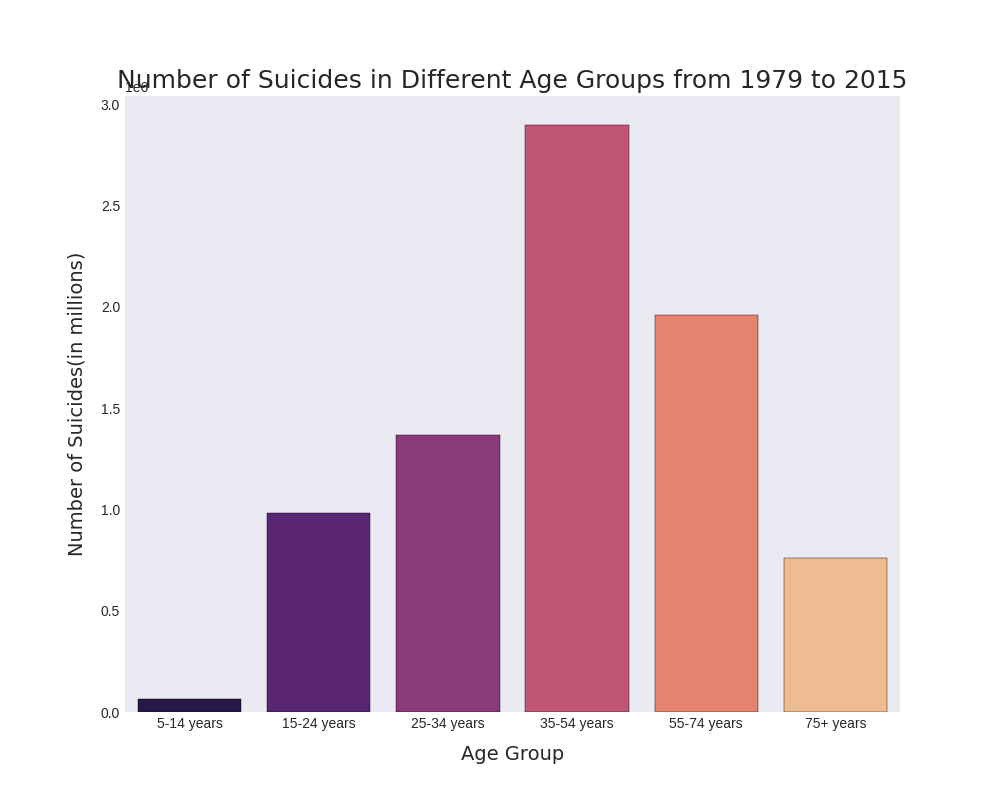

In [43]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(10,8))

sns.barplot(x = 'age', y = 'suicides',data=age_groups_df,order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'],palette='magma',edgecolor = 'black',linewidth=0.3)
plt.xlabel('Age Group',fontdict=fontdict_labels,labelpad=10)
plt.ylabel('Number of Suicides(in millions)',fontdict=fontdict_labels,labelpad=10)
plt.title('Number of Suicides in Different Age Groups from 1979 to 2015',fontdict=fontdict_title)

# plt.savefig('/home/allen/Documents/CDS/Project/Visualizations/Visual 4',bbox_inches='tight')

plt.show()

In [44]:
age_groups_per_gender_df = suicides_df2.groupby(['age','sex']).sum().reset_index()

In [45]:
thirtyFive_female = age_groups_per_gender_df[(age_groups_per_gender_df.age == '35-54 years') & (age_groups_per_gender_df.sex == 'female')].suicides.values
thirtyFive_male = age_groups_per_gender_df[(age_groups_per_gender_df.age == '35-54 years') & (age_groups_per_gender_df.sex == 'male')].suicides.values
(thirtyFive_male/thirtyFive_female)

array([3.75424582])

In [46]:
fiftyFive_female = age_groups_per_gender_df[(age_groups_per_gender_df.age == '55-74 years') & (age_groups_per_gender_df.sex == 'female')].suicides.values
fiftyFive_male = age_groups_per_gender_df[(age_groups_per_gender_df.age == '55-74 years') & (age_groups_per_gender_df.sex == 'male')].suicides.values
(fiftyFive_male/fiftyFive_female)

array([2.70204698])

<IPython.core.display.Javascript object>


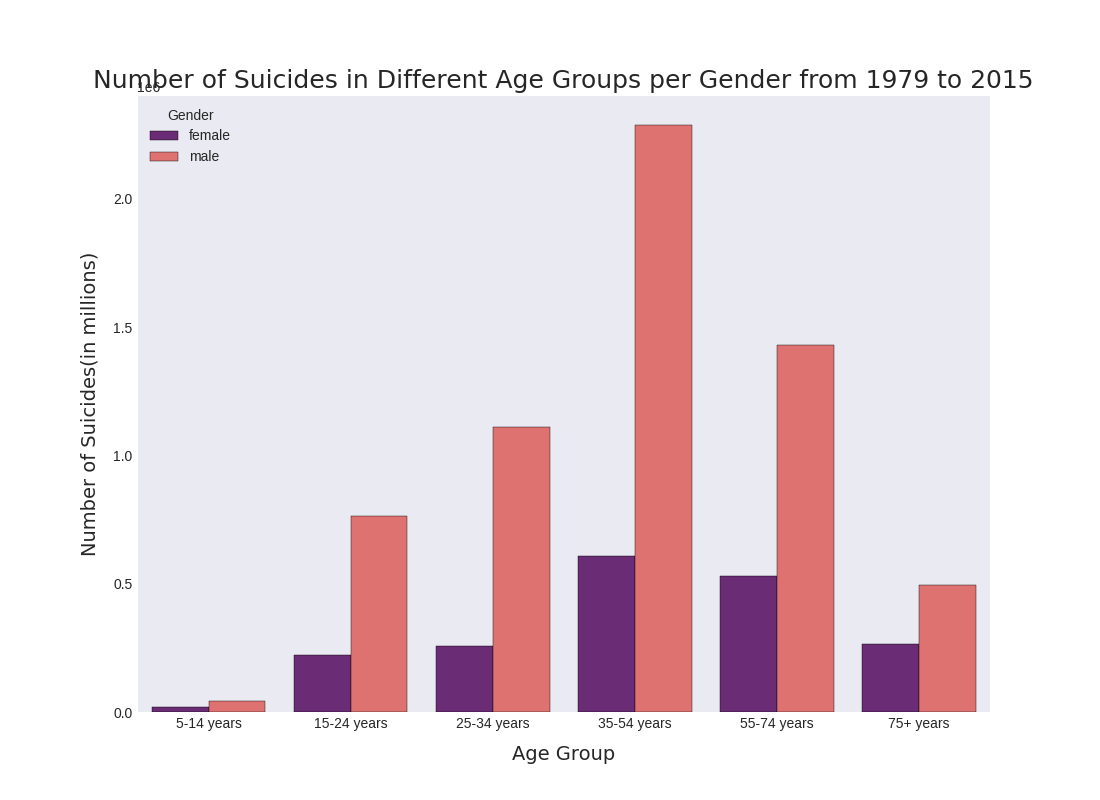

In [47]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(11,8))

sns.barplot(x = 'age', y = 'suicides',hue='sex',data=age_groups_per_gender_df,order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'],palette='magma',edgecolor = 'black',linewidth=0.3)
plt.xlabel('Age Group',fontdict=fontdict_labels,labelpad=10)
plt.ylabel('Number of Suicides(in millions)',fontdict=fontdict_labels,labelpad=10)
plt.title('Number of Suicides in Different Age Groups per Gender from 1979 to 2015',fontdict=fontdict_title)
plt.gca().legend(loc='upper left').set_title('Gender')

# plt.savefig('/home/allen/Documents/CDS/Project/Visualizations/Visual 5',bbox_inches='tight')

plt.show()

In [48]:
suicides_df2[suicides_df2['suicides'] == suicides_df2['suicides'].max()]

,country,year,sex,age,suicides,population
33128,Russian Federation,1994,male,35-54 years,22338.0,19044200.0


### 4.) Top 10 countries with the highest and lowest number of suicides

In [49]:
# Country with the highest number of suicides
countries_df = suicides_df2.groupby('country').sum().reset_index()
countries_df[countries_df['suicides'] == countries_df['suicides'].max()]

,country,year,suicides,population
104,Russian Federation,862920,1500992.0,4.868343e+09


In [50]:
# Top 10 countries with the highest suicides rates
countries_df.sort_values('suicides',ascending=False,inplace=True)
countries_df.head(10)

,country,year,suicides,population
104,Russian Federation,862920,1500992.0,4.868343e+09
135,United States of America,910860,1201401.0,9.637475e+09
62,Japan,886668,937614.0,4.340184e+09
42,France,862488,395500.0,1.973575e+09
132,Ukraine,791196,365170.0,1.521044e+09
45,Germany,624780,291262.0,2.024876e+09
99,Republic of Korea,744000,261730.0,1.354945e+09
18,Brazil,886668,250824.0,5.506640e+09
95,Poland,886668,172562.0,1.307487e+09
134,United Kingdom,910860,166314.0,2.116720e+09


<IPython.core.display.Javascript object>


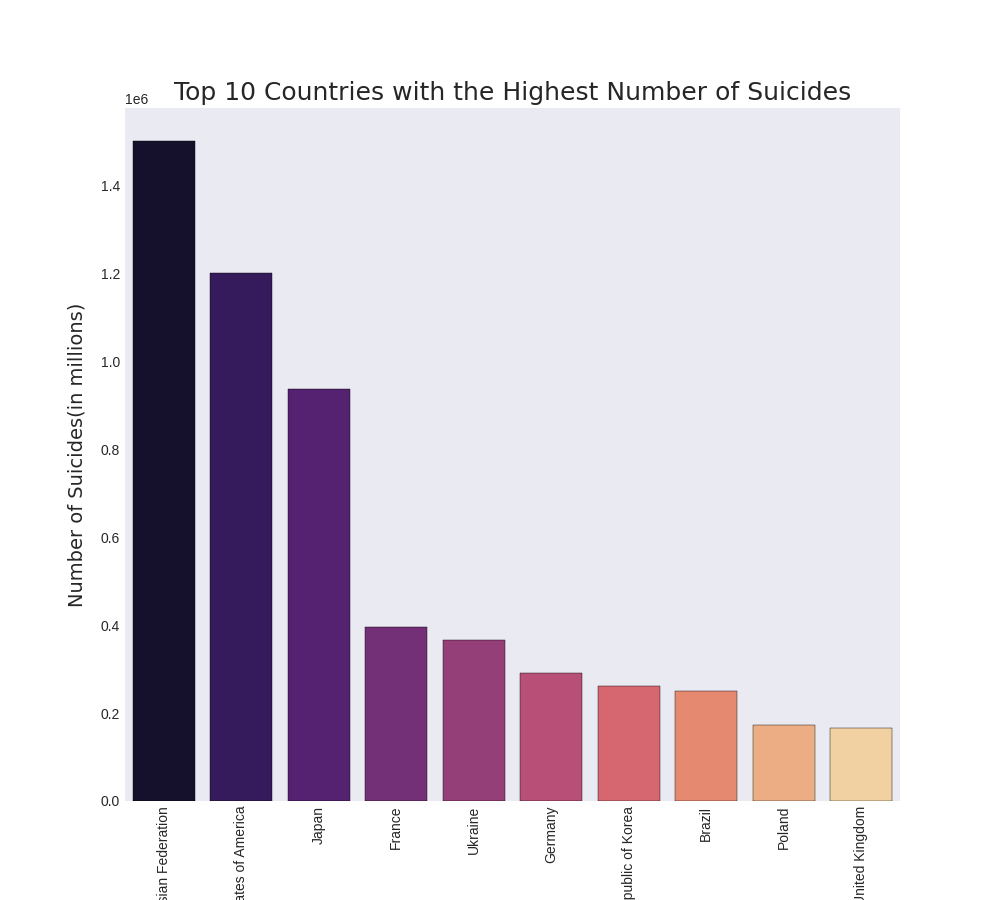

In [51]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(10,9))

sns.barplot(x = 'country', y = 'suicides',data=countries_df.head(10),palette='magma',edgecolor = 'black',linewidth=0.3)
plt.xlabel('Country',fontdict=fontdict_labels,labelpad=10)
plt.xticks(rotation=90)
plt.ylabel('Number of Suicides(in millions)',fontdict=fontdict_labels,labelpad=10)
plt.title('Top 10 Countries with the Highest Number of Suicides',fontdict=fontdict_title)

# plt.savefig('/home/allen/Documents/CDS/Project/Visualizations/Visual 6',bbox_inches='tight')

plt.show()

In [52]:
# Top 10 countries with the least suicides rates
countries_df.tail(10)

,country,year,suicides,population
2,Antigua and Barbuda,671628,11.0,2054919.0
19,British Virgin Islands,670236,8.0,0.0
131,Turks and Caicos Islands,718764,6.0,0.0
77,Mayotte,96600,6.0,754088.0
107,Saint Pierre and Miquelon,120456,5.0,0.0
110,Sao Tome and Principe,71472,4.0,265500.0
57,Iraq,24096,3.0,0.0
1,Anguilla,695832,2.0,0.0
39,Falkland Islands (Malvinas),118860,1.0,0.0
82,Montserrat,648972,1.0,0.0


<IPython.core.display.Javascript object>


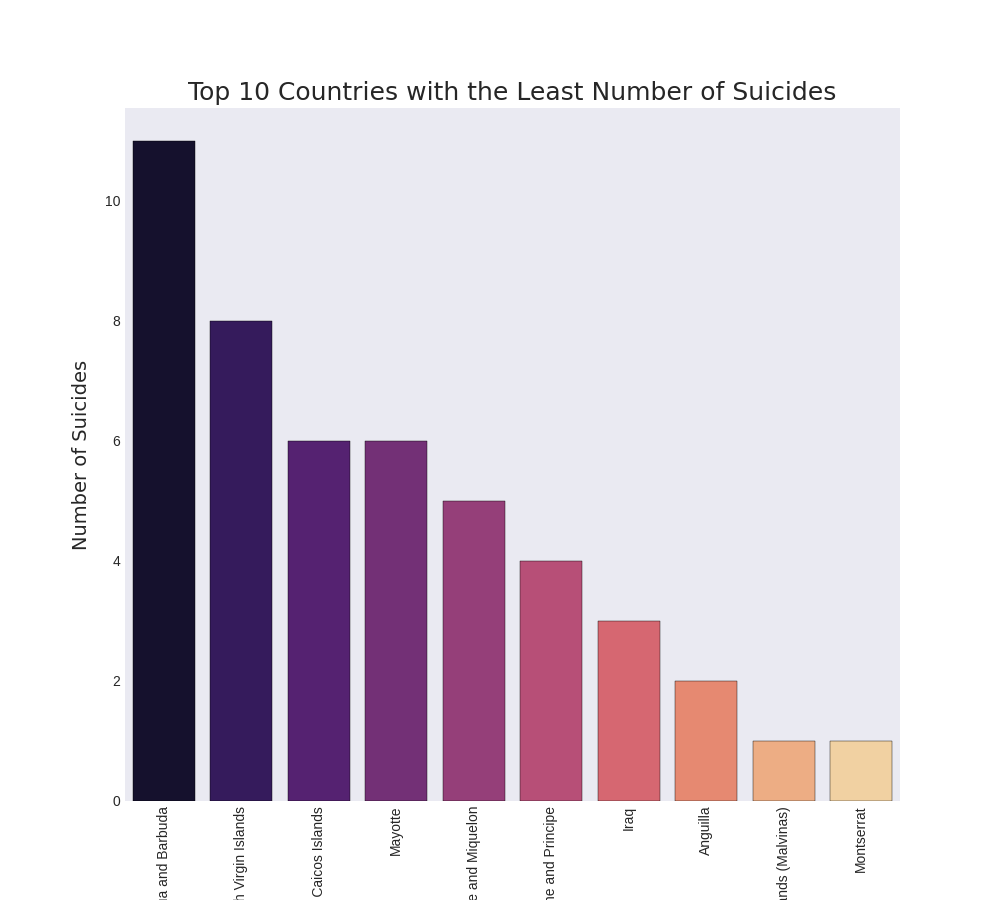

In [53]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(10,9))

sns.barplot(x = 'country', y = 'suicides',data=countries_df.tail(10),palette='magma',edgecolor = 'black',linewidth=0.3)
plt.xlabel('Country',fontdict=fontdict_labels,labelpad=10)
plt.xticks(rotation=90)
plt.ylabel('Number of Suicides',fontdict=fontdict_labels,labelpad=10)
plt.title('Top 10 Countries with the Least Number of Suicides',fontdict=fontdict_title)

# plt.savefig('/home/allen/Documents/CDS/Project/Visualizations/Visual 7',bbox_inches='tight')

plt.show()

# MACHINE LEARNING

* For purposes of machine learning, we shall use suicides_df1 which is the data in which null values have been dealt with for both the suicides and population column

### Machine Learning Libraries

In [54]:
# For correlation
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Label Encoding library
from sklearn.preprocessing import LabelEncoder

# Libraries to assist with Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Decision Trees Library
from sklearn.tree import DecisionTreeRegressor

# Random Forest Library
from sklearn.ensemble import RandomForestRegressor

# Min Max Scaling
from sklearn.preprocessing import MinMaxScaler

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [55]:
suicides_df1.isna().sum()

country       0
year          0
sex           0
age           0
suicides      0
population    0
dtype: int64

<IPython.core.display.Javascript object>


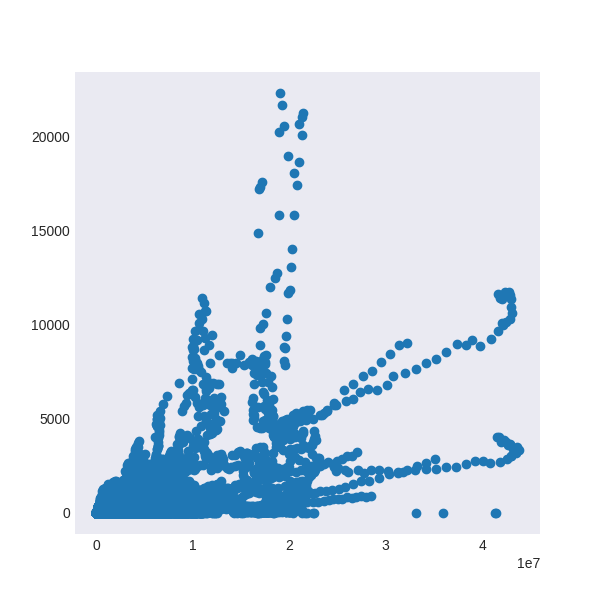

In [56]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(6,6))

plt.scatter(suicides_df1['population'],suicides_df1['suicides'])
plt.show()

In [57]:
covariance = np.cov(suicides_df1['population'],suicides_df1['suicides'])
print(covariance)

[[1.33022956e+13 1.82767258e+09]
 [1.82767258e+09 6.91431815e+05]]


In [58]:
corr, _ = pearsonr(suicides_df1['population'], suicides_df1['suicides'])
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.60264


In [59]:
corr, _ = spearmanr(suicides_df1['population'], suicides_df1['suicides'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.702


In [60]:
suicides_df1.corr()

,year,suicides,population
year,1.000000,0.002756,0.027016
suicides,0.002756,1.000000,0.602643
population,0.027016,0.602643,1.000000


### Label Encoding for the 'sex' column and 'age' column

In [61]:
le = LabelEncoder()

suicides_df1['sex'] = le.fit_transform(suicides_df1['sex']) # Female is 0, Male is 1
suicides_df1['age'] = le.fit_transform(suicides_df1['age'])

In [62]:
suicides_df1.mean()

year          1.998376e+03
sex           5.000000e-01
age           2.500000e+00
suicides      2.087501e+02
population    1.664091e+06
dtype: float64

### 1.) Linear Regression using 1 independent variable for prediction 

In [63]:
# Identifying independent and dependent variables to be used in the regression model
x = suicides_df1.population.values.reshape(-1,1)
y = suicides_df1.suicides.values.reshape(-1,1)

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [65]:
x_test

array([[9.733290e+06],
       [2.400000e+03],
       [3.501036e+06],
       ...,
       [1.087670e+07],
       [4.803160e+05],
       [1.870100e+04]])

In [66]:
linear_regressor = LinearRegression()

In [67]:
linear_regressor.fit(x_train,y_train)

LinearRegression()

In [68]:
linear_regressor.coef_

array([[0.00013729]])

In [69]:
linear_regressor.intercept_

array([-21.19817215])

In [70]:
ypred1 = linear_regressor.predict(x_test)

In [71]:
# Comparing the actual values set aside when splitting the data to the values that have been predicted by the model
comparison_df1 = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':ypred1.flatten()})
comparison_df1

,Actual,Predicted
0,1087.0,1315.094608
1,0.0,-20.868674
2,101.0,459.462440
3,22.0,-12.172801
4,26.0,-8.981061
...,...,...
7659,0.0,-11.813648
7660,11.0,2.626616
7661,1009.0,1472.074471
7662,151.0,44.744875


<IPython.core.display.Javascript object>


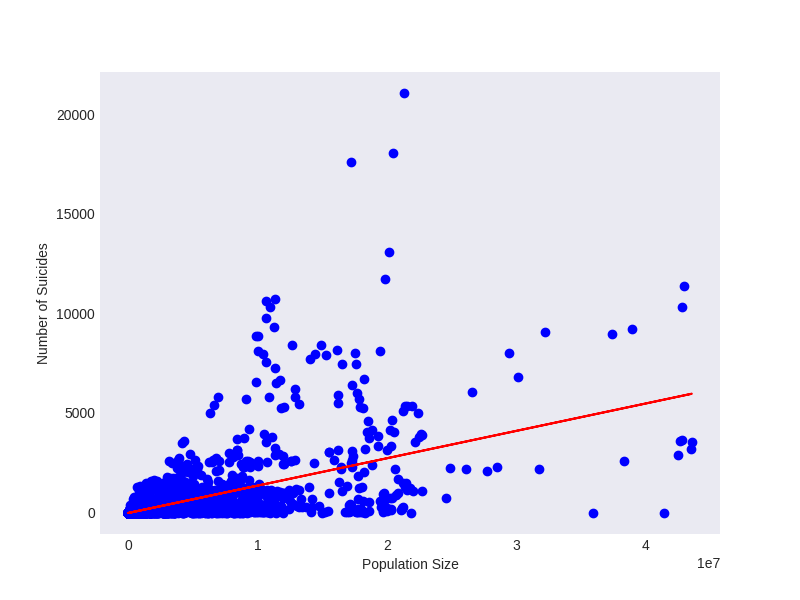

In [72]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(8,6))

plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,ypred1,color='red')
plt.xlabel('Population Size')
plt.ylabel('Number of Suicides')

plt.show()

In [73]:
print('Mean Absolute error:',metrics.mean_absolute_error(y_test,ypred1))
print('Mean Squared error:',metrics.mean_squared_error(y_test,ypred1))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test,ypred1)))
print('R-squared:',metrics.r2_score(y_test,ypred1))

Mean Absolute error: 200.934231846126
Mean Squared error: 470863.0376986624
Root Mean Squared error: 686.194606287941
R-squared: 0.349476451488656


### 2.) Linear Regression using 2 independent variables for prediction 

In [74]:
# Identifying independent and dependent variables to be used in the regression model
x_2 = suicides_df1[['sex','population']]
y_2 = suicides_df1.suicides.values

In [75]:
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x_2,y_2,test_size=0.2,random_state=0)

In [76]:
linear_regressor_2 = LinearRegression()

In [77]:
linear_regressor_2.fit(x_train_2,y_train_2)

LinearRegression()

In [78]:
coeff_df_1 = pd.DataFrame(linear_regressor_2.coef_, x_2.columns, columns=['Coefficient'])  
coeff_df_1

,Coefficient
sex,227.061084
population,0.000138


In [79]:
linear_regressor_2.intercept_

-135.51299527899516

In [80]:
ypred2 = linear_regressor_2.predict(x_test_2)

In [81]:
x_test_2

,sex,population
33205,0,9733290.0
33452,1,2400.0
41688,0,3501036.0
17394,1,65739.0
31127,1,88987.0
...,...,...
32259,0,68355.0
28978,1,173535.0
15578,0,10876700.0
11398,1,480316.0


In [82]:
# Comparing the actual values set aside when splitting the data to the values that have been predicted by the model
comparison_df2 = pd.DataFrame({'Actual':y_test_2, 'Predicted':ypred2})
comparison_df2

,Actual,Predicted
0,1087.0,1203.454947
1,0.0,91.878247
2,101.0,346.109865
3,22.0,100.591528
4,26.0,103.789658
...,...,...
7659,0.0,-126.109684
7660,11.0,115.420572
7661,1009.0,1360.749072
7662,151.0,157.623149


In [83]:
print('Mean Absolute error:',metrics.mean_absolute_error(y_test_2,ypred2))
print('Mean Squared error:',metrics.mean_squared_error(y_test_2,ypred2))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test_2,ypred2)))
print('R-squared:',metrics.r2_score(y_test_2,ypred2))

Mean Absolute error: 240.05562195613197
Mean Squared error: 456018.5535157556
Root Mean Squared error: 675.2914581984253
R-squared: 0.36998493432409374


### 3.) Linear Regression using 3 independent variables for prediction 

In [84]:
x_3 = suicides_df1[['sex','age','population']]
y_3 = suicides_df1.suicides.values

In [85]:
x_train_3,x_test_3,y_train_3,y_test_3 = train_test_split(x_3,y_3,test_size=0.2,random_state=0)

In [86]:
# Creating the scaler
scaler = MinMaxScaler()

# scaling the independent variables
x_train_3 = scaler.fit_transform(x_train_3)
x_test_3 = scaler.transform(x_test_3)

In [87]:
linear_regressor_3 = LinearRegression()

In [88]:
linear_regressor_3.fit(x_train_3,y_train_3)

LinearRegression()

In [89]:
coeff_df_2 = pd.DataFrame(linear_regressor_3.coef_, x_3.columns, columns=['Coefficient'])  
coeff_df_2

,Coefficient
sex,227.204307
age,96.050897
population,6064.356067


In [90]:
linear_regressor_3.intercept_

-184.89302087456605

In [91]:
ypred3 = linear_regressor_3.predict(x_test_3)

In [92]:
comparison_df3 = pd.DataFrame({'Actual':y_test_3, 'Predicted':ypred3})
comparison_df3

,Actual,Predicted
0,1087.0,1181.757547
1,0.0,81.028045
2,101.0,299.754395
3,22.0,51.376334
4,26.0,150.645683
...,...,...
7659,0.0,-117.835275
7660,11.0,143.140325
7661,1009.0,1359.261357
7662,151.0,185.611074


In [93]:
print('Mean Absolute error:',metrics.mean_absolute_error(y_test_3,ypred3))
print('Mean Squared error:',metrics.mean_squared_error(y_test_3,ypred3))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test_3,ypred3)))
print('R-squared:',metrics.r2_score(y_test_3,ypred3))

Mean Absolute error: 238.80240517537428
Mean Squared error: 455102.03002884926
Root Mean Squared error: 674.6125036114059
R-squared: 0.371251162639466


### Prediction of the Number of Suicides using Decision Trees

In [94]:
decision_tree = DecisionTreeRegressor()

In [95]:
decision_tree.fit(x_train_3,y_train_3)

DecisionTreeRegressor()

In [96]:
decision_tree_pred = decision_tree.predict(x_test_3)

In [97]:
dtree_comparison_df = pd.DataFrame({'Actual':y_test_3, 'Predicted':decision_tree_pred})
dtree_comparison_df

,Actual,Predicted
0,1087.0,225.0
1,0.0,0.0
2,101.0,95.0
3,22.0,6.0
4,26.0,33.0
...,...,...
7659,0.0,0.0
7660,11.0,101.0
7661,1009.0,971.0
7662,151.0,187.0


In [98]:
print('Mean Squared error:',metrics.mean_squared_error(y_test_3,decision_tree_pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test_3,decision_tree_pred)))
print('R-squared:',metrics.r2_score(y_test_3,decision_tree_pred))

Mean Squared error: 263892.31959803874
Root Mean Squared error: 513.7045061103112
R-squared: 0.635418042136346


### Prediction of the Number of Suicides using Random Forest

In [99]:
random_forest = RandomForestRegressor()

In [100]:
random_forest.fit(x_train_3,y_train_3)

RandomForestRegressor()

In [101]:
random_forest_pred = random_forest.predict(x_test_3)

In [102]:
random_forest_comparison_df = pd.DataFrame({'Actual':y_test_3, 'Predicted':random_forest_pred})
random_forest_comparison_df

,Actual,Predicted
0,1087.0,462.2800
1,0.0,0.0275
2,101.0,97.9500
3,22.0,12.7500
4,26.0,44.5000
...,...,...
7659,0.0,0.2700
7660,11.0,89.7900
7661,1009.0,696.6800
7662,151.0,138.9100


In [103]:
print('Mean Squared error:',metrics.mean_squared_error(y_test_3,random_forest_pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test_3,random_forest_pred)))
print('R-squared:',metrics.r2_score(y_test_3,random_forest_pred))

Mean Squared error: 194308.08667849997
Root Mean Squared error: 440.80390955446387
R-squared: 0.7315525409079977


### Evaluation of Models

In [104]:
# RMSE values for the three models
linear_regression_rmse = np.sqrt(metrics.mean_squared_error(y_test_3,ypred3))
decision_trees_rmse = np.sqrt(metrics.mean_squared_error(y_test_3,decision_tree_pred))
random_forest_rmse = np.sqrt(metrics.mean_squared_error(y_test_3,random_forest_pred))

In [105]:
# R-squared values for the three models
linear_regression_r2 = metrics.r2_score(y_test_3,ypred3)
decision_trees_r2 = metrics.r2_score(y_test_3,decision_tree_pred)
random_forest_r2 = metrics.r2_score(y_test_3,random_forest_pred)

In [106]:
rmses = [linear_regression_rmse,decision_trees_rmse,random_forest_rmse]
r2_values = [linear_regression_r2,decision_trees_r2,random_forest_r2]
eval_rows = ['Linear Regression','Decision Trees','Random Forest']

In [107]:
evaluations = pd.DataFrame({"Model_Type":eval_rows,"RMSE":rmses,"R-squared":r2_values})
evaluations

,Model_Type,RMSE,R-squared
0,Linear Regression,674.612504,0.371251
1,Decision Trees,513.704506,0.635418
2,Random Forest,440.803910,0.731553


<IPython.core.display.Javascript object>


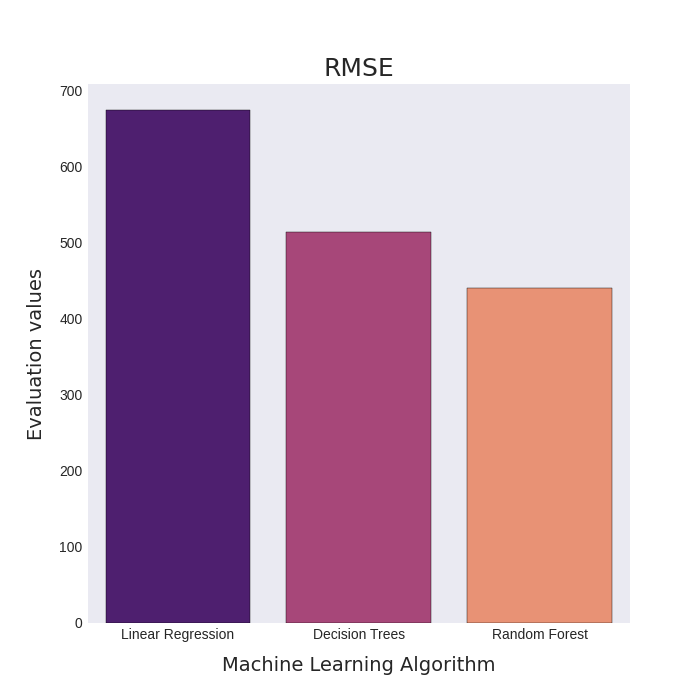

In [108]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(7,7))

sns.barplot(x = 'Model_Type', y = 'RMSE',data=evaluations,palette='magma',edgecolor = 'black',linewidth=0.3)
plt.xlabel('Machine Learning Algorithm',fontdict=fontdict_labels,labelpad=10)
# plt.xticks(rotation=90)
plt.ylabel('Evaluation values',fontdict=fontdict_labels,labelpad=10)
plt.title('RMSE',fontdict=fontdict_title)

# plt.savefig('/home/allen/Documents/CDS/Project/Visualizations/Visual 8',bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


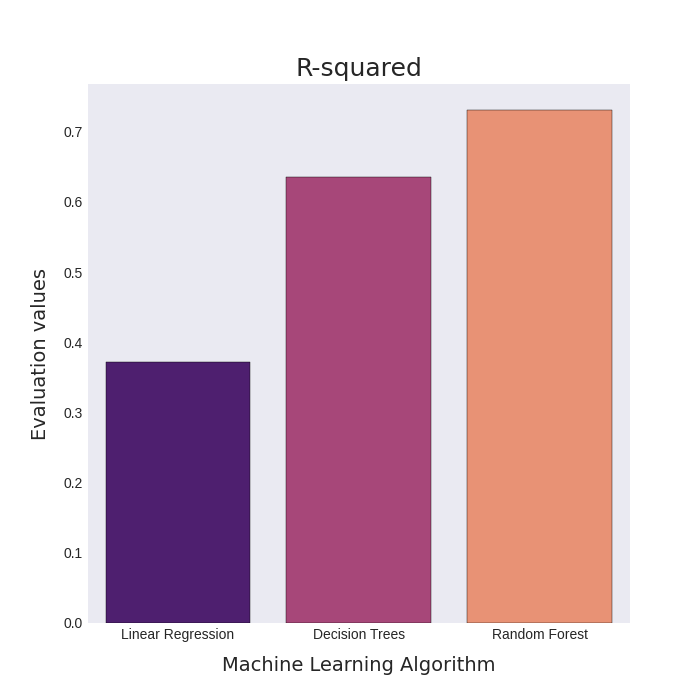

In [109]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(7,7))

sns.barplot(x = 'Model_Type', y = 'R-squared',data=evaluations,palette='magma',edgecolor = 'black',linewidth=0.3)
plt.xlabel('Machine Learning Algorithm',fontdict=fontdict_labels,labelpad=10)
# plt.xticks(rotation=90)
plt.ylabel('Evaluation values',fontdict=fontdict_labels,labelpad=10)
plt.title('R-squared',fontdict=fontdict_title)

# plt.savefig('/home/allen/Documents/CDS/Project/Visualizations/Visual 9',bbox_inches='tight')

plt.show()